In [1]:
import warnings
warnings.filterwarnings('ignore')

# **SALES PREDICTION**

## **Import Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_squared_error

## **Load Dataset**

In [3]:
data=pd.read_csv('/kaggle/input/advertising-dataset/advertising.csv')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


## **EDA**

In [4]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


> ### **Check for null values** 

In [5]:
data.isnull().sum()*100/data.shape[0]

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

> ### **Outlier**

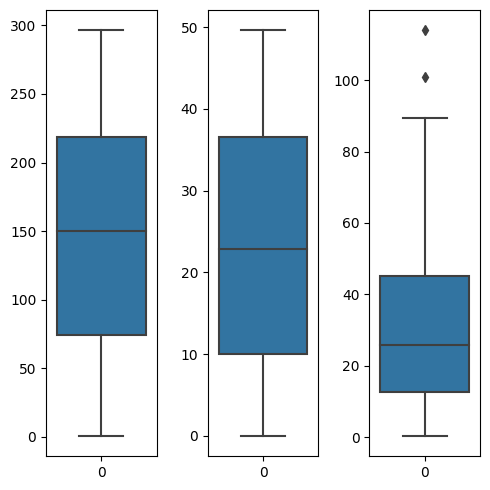

In [6]:
fig,axs=plt.subplots(ncols=3,figsize=[5,5])
plt1=sns.boxplot(data['TV'],ax=axs[0])
plt2=sns.boxplot(data['Radio'],ax=axs[1])
plt3=sns.boxplot(data['Newspaper'],ax=axs[2])
plt.tight_layout()

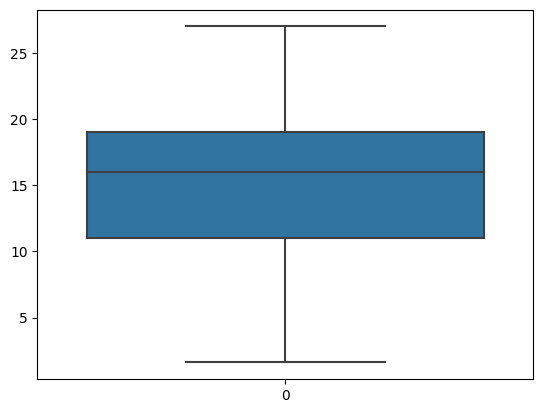

In [7]:
sns.boxplot(data['Sales'])
plt.show()

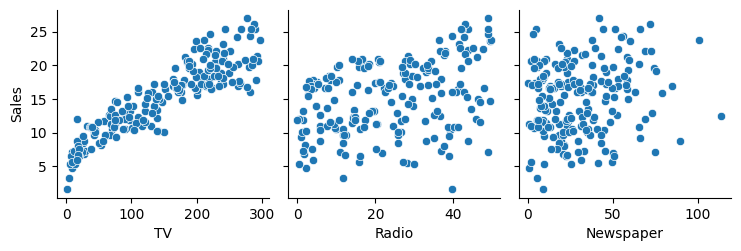

In [8]:
sns.pairplot(data,kind='scatter',y_vars='Sales',x_vars=['TV','Radio','Newspaper'])
plt.show()

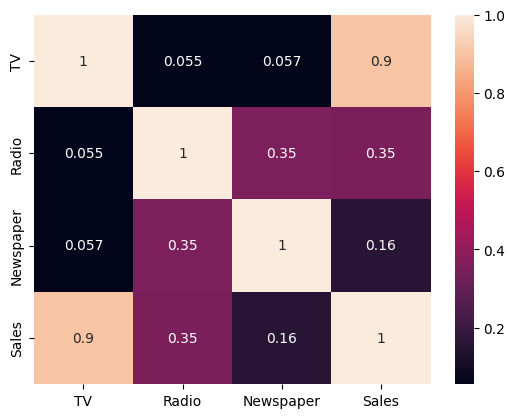

In [9]:
sns.heatmap(data.corr(),annot=True)
plt.show()

> **Since TV is the most Correlated to Sales (0.9) from the Above Heatmap, We proceed with applying regrssion using TV as the feature**

## **Splitting Dataset** 

In [10]:
x=data['TV']
y=data['Sales']

In [11]:
xtrain, xtest, ytrain, ytest=train_test_split(x,y,test_size=0.25,shuffle=True,random_state=100)

## **Train Regression Model**

In [12]:
xtrainsm=sm.add_constant(xtrain)
lr=sm.OLS(ytrain,xtrainsm).fit()

## **Parameter Results**

In [13]:
lr.params

const    7.00822
TV       0.05425
dtype: float64

In [14]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     666.4
Date:                Fri, 14 Jun 2024   Prob (F-statistic):           1.14e-56
Time:                        05:17:00   Log-Likelihood:                -340.57
No. Observations:                 150   AIC:                             685.1
Df Residuals:                     148   BIC:                             691.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0082      0.362     19.382      0.000       6.294       7.723
TV             0.0542      0.002     25.814      0.000       0.050       0.058
==============================================================================
Omnibus:                        0.006   Durbin-Watson:                   2.207
Prob(Omnibus):                  0.997   Jarque-Bera (JB):                0.042
Skew:                          -0.011   Prob(JB):                        0.979
Kurtosis:                       2.921   Cond. No.                         323.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

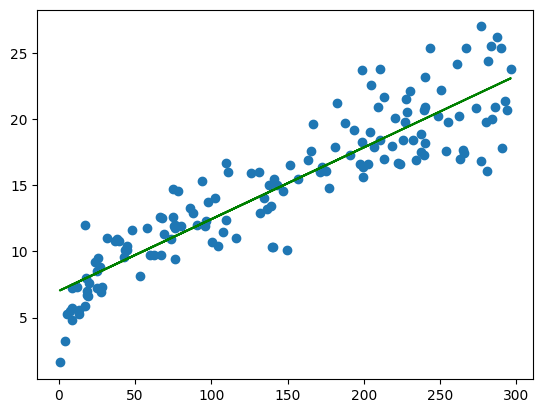

In [15]:
plt.scatter(xtrain,ytrain)
plt.plot(xtrain,7.00822+xtrain*0.05425,'g')

In [16]:
ypredict=lr.predict(xtrainsm)
res=ytrain-ypredict

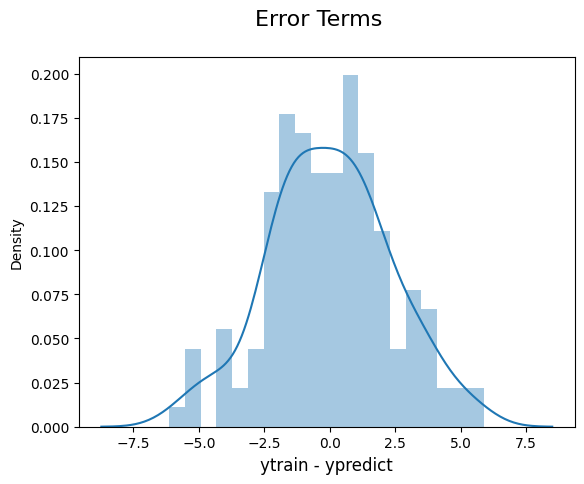

In [17]:
fig=plt.figure()
sns.distplot(res,bins=20)
fig.suptitle('Error Terms', fontsize = 16)
plt.xlabel('ytrain - ypredict', fontsize = 12)
plt.show()

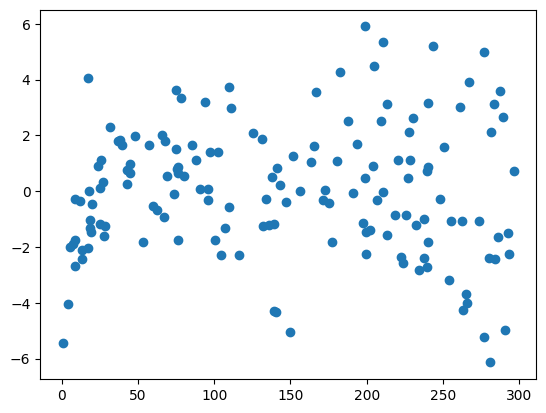

In [18]:
plt.scatter(xtrain,res)
plt.show()

In [19]:
xtestsm=sm.add_constant(xtest)
ypredict2=lr.predict(xtestsm)

In [20]:
np.sqrt(mean_squared_error(ytest,ypredict2))

2.127324155623923

In [21]:
r2_score(ytest,ypredict2)

0.7723404266389128

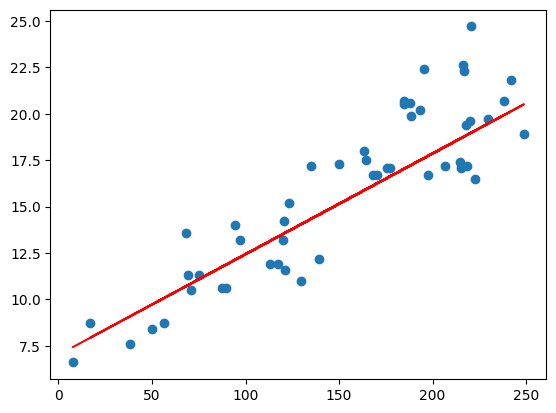

In [22]:
plt.scatter(xtest,ytest)
plt.plot(xtest,7.00822+xtest*0.05425,'r')
plt.show()